<a href="https://colab.research.google.com/github/nityanantan23/data-analytics/blob/main/nity_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data analytics template
### Author : Nityanantan


## 1. Add variable values




In [1]:
dataset_name='weatherAUS.csv'
title_name='title'
target_variable_name='RainTomorrow'

## 2. Import libraries <a class="anchor" id="2"></a>


The first step in building the model is to import the necessary libraries. After running this restart runtime if you are using colab.

In [10]:
!pip install --pre pycaret --quiet
!pip install -U dataprep --quiet
!pip install py-AutoClean --quiet


     |████████████████████████████████| 9.5 MB 15.2 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 71.2 MB/s 
     |████████████████████████████████| 133 kB 54.5 MB/s 
     |████████████████████████████████| 28.5 MB 1.4 MB/s 
     |████████████████████████████████| 141 kB 63.6 MB/s 
     |████████████████████████████████| 232 kB 63.5 MB/s 
     |████████████████████████████████| 96 kB 6.4 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.7.1 which is incompatible.


In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np # linear algebra
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import files


## 3. Import dataset <a class="anchor" id="3"></a>


The next step is to import the dataset.

In [3]:
df=pd.read_csv(dataset_name) if 'csv' in dataset_name else pd.read_xlsx(dataset_name)

### Preview the dataset <a class="anchor" id="4.2"></a>

In [4]:
df.head() 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
col_names = df.columns

col_names #column names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info() # summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.describe() # statistical properties

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## 4. Analysis EDA <a class="anchor" id="4"></a>

DataPrep Report
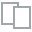
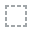
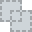
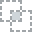
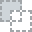
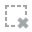
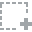
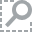
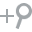
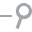
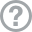
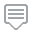
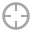
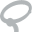
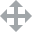
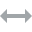
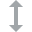
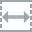
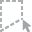
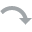
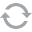
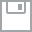
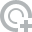
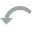
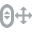
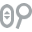
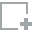
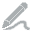
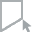
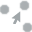
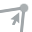
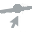

In [8]:
from dataprep.eda import *
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report
from dataprep.clean import clean_df_gui

create_report(df)

## 5. Preprocessing

In [9]:
from IPython.display import IFrame, display
from dataprep.clean.gui.clean_gui import launch

clean_df_gui(df)

 * Serving Flask app 'dataprep.clean.gui.clean_gui'
 * Debug mode: off


In [ ]:
from AutoClean import AutoClean
pipeline = AutoClean(df)

In [ ]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
# check missing values in categorical variables

df[categorical].isnull().sum()

NameError: ignored

In [ ]:
# check for cardinality in categorical variables

for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Location  contains  49  labels
WindGustDir  contains  18  labels
WindDir9am  contains  18  labels
WindDir3pm  contains  18  labels
RainToday  contains  4  labels
RainTomorrow  contains  4  labels


In [ ]:
    categorical= [var for var in df.columns if df[var].dtype=='O'] # define categorical
    numerical = [var for var in df.columns if df[var].dtype!='O'] # define numerical

# 5. Model training

In [11]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)

In [12]:
# Import module
import jinja2
from pycaret.classification import *
# Initialize setup (when using Notebook environment)
setup(training_data, target = target_variable_name)
best = compare_models()


'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 5e1f
INFO:logs:self.variable_keys: {'X', 'memory', 'fold_shuffle_param', '_is_multiclass', '_all_metrics', 'X_test', 'display_container', 'log_plots_param', '_ml_usecase', 'y_test', '_available_plots', 'fix_imbalance', 'USI', 'target_param', 'pipeline', 'X_train', 'data', 'n_jobs_param', 'y', 'logging_param', 'idx', 'fol

ValueError: ignored

In [ ]:
evaluate_model(best)

In [ ]:
predictions= predict_model(best,data=testing_data)

In [ ]:
save_model(best,'best_pipeline')